In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.interpolate import interp1d

Text(0, 0.5, 'Voltage (V)')

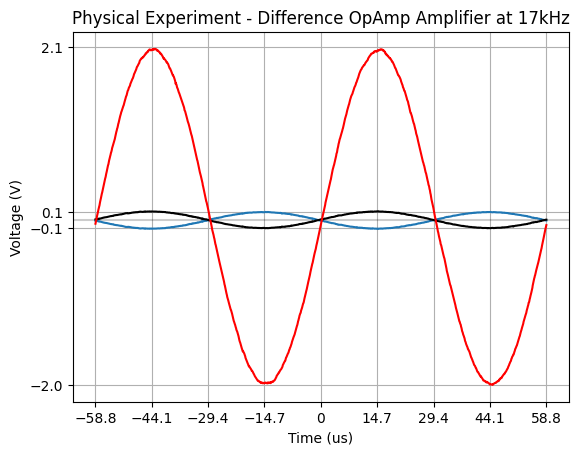

In [2]:
#Part 1a
df17k = pd.read_csv(".\inlab\difference\diffAmp17k.csv", encoding="latin1", skiprows=28)
df17k.columns = ['time', "output", "input"]
df17k['time'] = df17k['time'].shift(periods=-25)

df17k["input2"] = df17k["input"] * -1

df17k = df17k[(df17k['time'] < 1/17000) & (df17k['time'] > -1/17000)]
#Draw a horizontal line at 0 with transparency
plt.axhline(y=0, color='k', alpha=.2)

plt.plot(df17k['time'], df17k['input'], label="Input")
plt.plot(df17k['time'], df17k['input2'], label="Input", c='k')
plt.plot(df17k['time'], df17k['output'], label="Output", c='r')
plt.xticks([-1/17000, -0.75/17000, -0.5/17000, -0.25/17000, 0, 0.25/17000, 0.5/17000, 0.75/17000, 1/17000], ['−58.8', '−44.1', '−29.4', '−14.7', '0', '14.7', '29.4', '44.1', '58.8'])
plt.yticks([-2.0, -.1, .1, 2.1])
plt.grid()
plt.title("Physical Experiment - Difference OpAmp Amplifier at 17kHz")
plt.xlabel("Time (us)")
plt.ylabel("Voltage (V)")



Text(0.5, 1.0, 'Physical Experiment - Difference Amplifier')

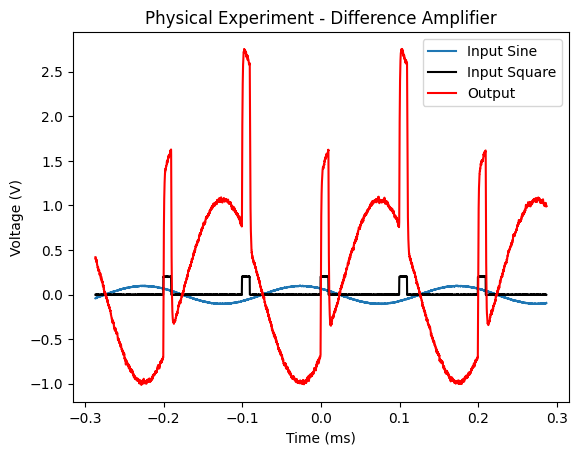

In [3]:
#Part 1B
dfInputSineB = pd.read_csv(".\inlab\difference\diffAmpB_inputSine.csv", encoding="latin1", skiprows=28)
dfInputSquareB = pd.read_csv(".\inlab\difference\diffAmpB_inputSquare.csv", encoding="latin1", skiprows=28)
dfInputSineB.columns = ['time', "output", "input"]
dfInputSquareB.columns = ['time', "output", "input"]

plt.plot(dfInputSineB['time'] * 1000, dfInputSineB['input'], label="Input Sine")
plt.plot(dfInputSquareB['time'] * 1000, dfInputSquareB['input'], label="Input Square", c='k')
plt.plot(dfInputSineB['time'] * 1000, dfInputSineB['output'], label="Output", c='r')
plt.legend()
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (V)")
plt.title("Physical Experiment - Difference Amplifier")



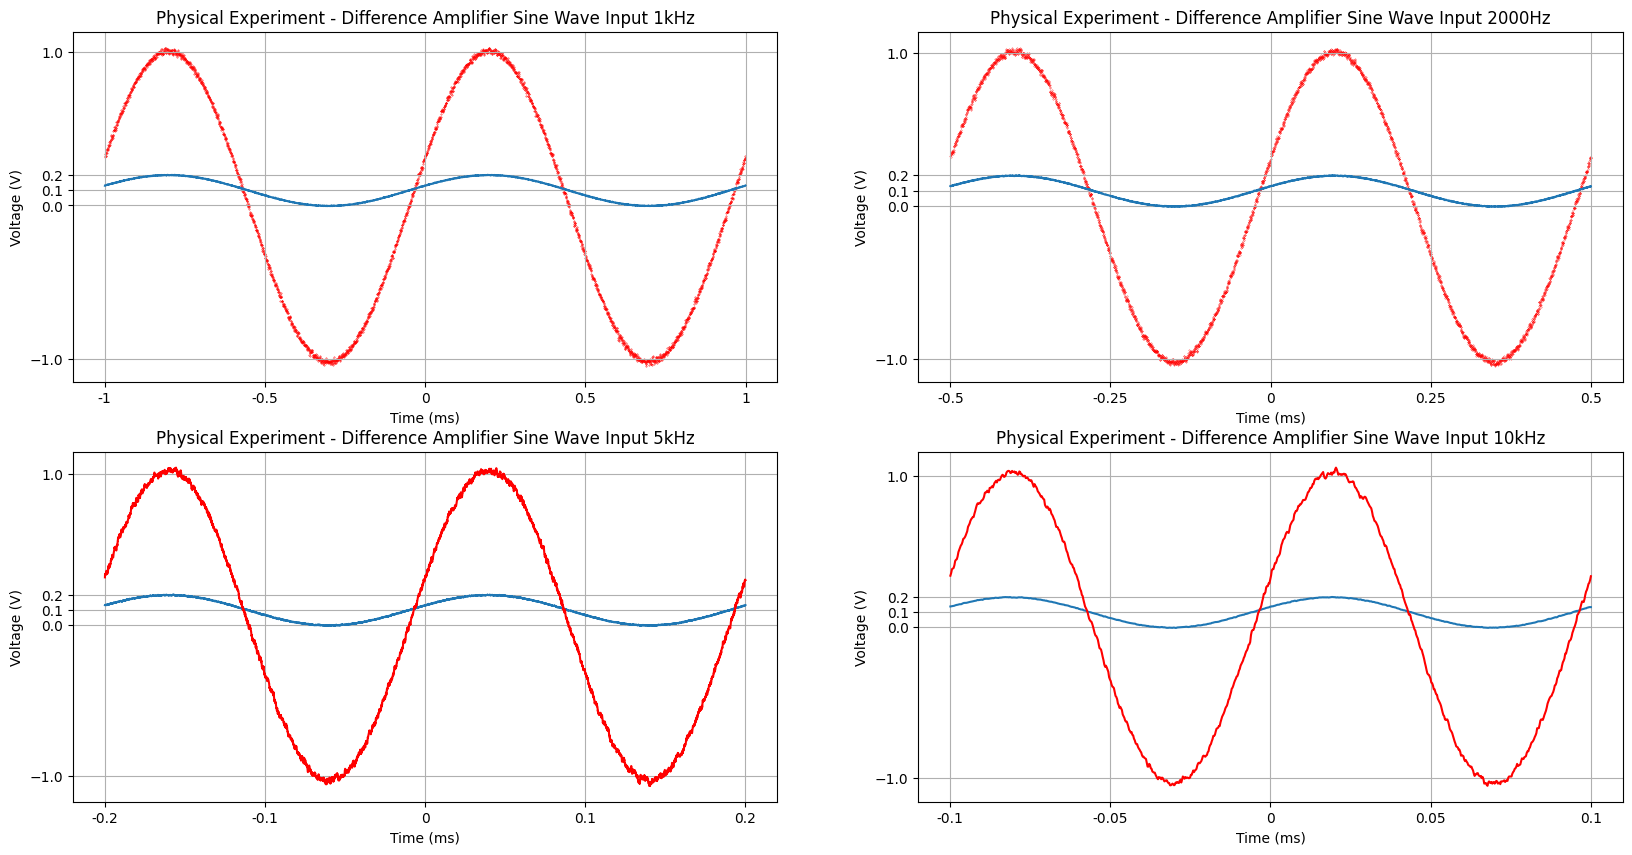

In [7]:
#Part 1 Additional

df1k = pd.read_csv(".\inlab\difference\diffAmpAdditional1kHz.csv", skiprows=23, encoding="latin1")
df1k.columns = ["time", "outputV", "inputV"]
df2k = pd.read_csv(".\inlab\difference\diffAmpAdditional2kHz.csv", skiprows=23, encoding="latin1")
df2k.columns = ["time", "outputV", "inputV"]
df5k = pd.read_csv(".\inlab\difference\diffAmpAdditional5kHz.csv", skiprows=23, encoding="latin1")
df5k.columns = ["time", "outputV", "inputV"]
df10k = pd.read_csv(".\inlab\difference\diffAmpAdditional10kHz.csv", skiprows=23, encoding="latin1")
df10k.columns = ["time", "outputV", "inputV"]

differentialSineDataset = [df1k, df2k, df5k, df10k]

#Plot all df in differentialSineDataset
#Get the point where the input is 0 and greater than -0015
plt.figure(figsize=(20,10))


plt.subplot(2,2,1)
df1k = df1k[(df1k["time"] > -1/1000) & (df1k["time"] < 1/1000 )]
plt.plot(df1k["time"], df1k["inputV"], label="input")
plt.scatter(df1k["time"], df1k["outputV"], label="output", s=0.1, c="r")
plt.xticks([-1/1000,-.5/1000, 0, .5/1000, 1/1000], ["-1", "-0.5", "0", "0.5", "1"])
plt.yticks([-1, 0, .1, .2, 1])
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (V)")
plt.title("Physical Experiment - Difference Amplifier Sine Wave Input 1kHz")
plt.grid()

plt.subplot(2,2,2)
df2k = df2k[(df2k["time"] > -1/2000) & (df2k["time"] < 1/2000 )]
plt.plot(df2k["time"], df2k["inputV"], label="input")
plt.scatter(df2k["time"], df2k["outputV"], label="output", s=0.05, c="r")
plt.xticks([-1/2000,-.5/2000, 0, .5/2000, 1/2000], ["-0.5", "-0.25", "0", "0.25", "0.5"])
plt.yticks([-1, 0, .1, .2, 1])
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (V)")
plt.title("Physical Experiment - Difference Amplifier Sine Wave Input 2000Hz")
plt.grid()

plt.subplot(2,2,3)
df5k = df5k[(df5k["time"] > -1/5000) & (df5k["time"] < 1/5000 )]
plt.plot(df5k["time"], df5k["inputV"], label="input")
plt.plot(df5k["time"], df5k["outputV"], label="output", c="r")
plt.xticks([-1/5000,-.5/5000, 0, .5/5000, 1/5000], ["-0.2", "-0.1", "0", "0.1", "0.2"])
plt.yticks([-1, 0, .1, .2, 1])
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (V)")
plt.title("Physical Experiment - Difference Amplifier Sine Wave Input 5kHz")
plt.grid()

plt.subplot(2,2,4)
df10k = df10k[(df10k["time"] > -1/10000) & (df10k["time"] < 1/10000 )]
plt.plot(df10k["time"], df10k["inputV"], label="input")
plt.plot(df10k["time"], df10k["outputV"], label="output", c="r")
plt.xticks([-1/10000,-.5/10000, 0, .5/10000, 1/10000], ["-0.1", "-0.05", "0", "0.05", "0.1"])
plt.yticks([-1, 0, .1, .2, 1])
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (V)")
plt.title("Physical Experiment - Difference Amplifier Sine Wave Input 10kHz")
plt.grid()



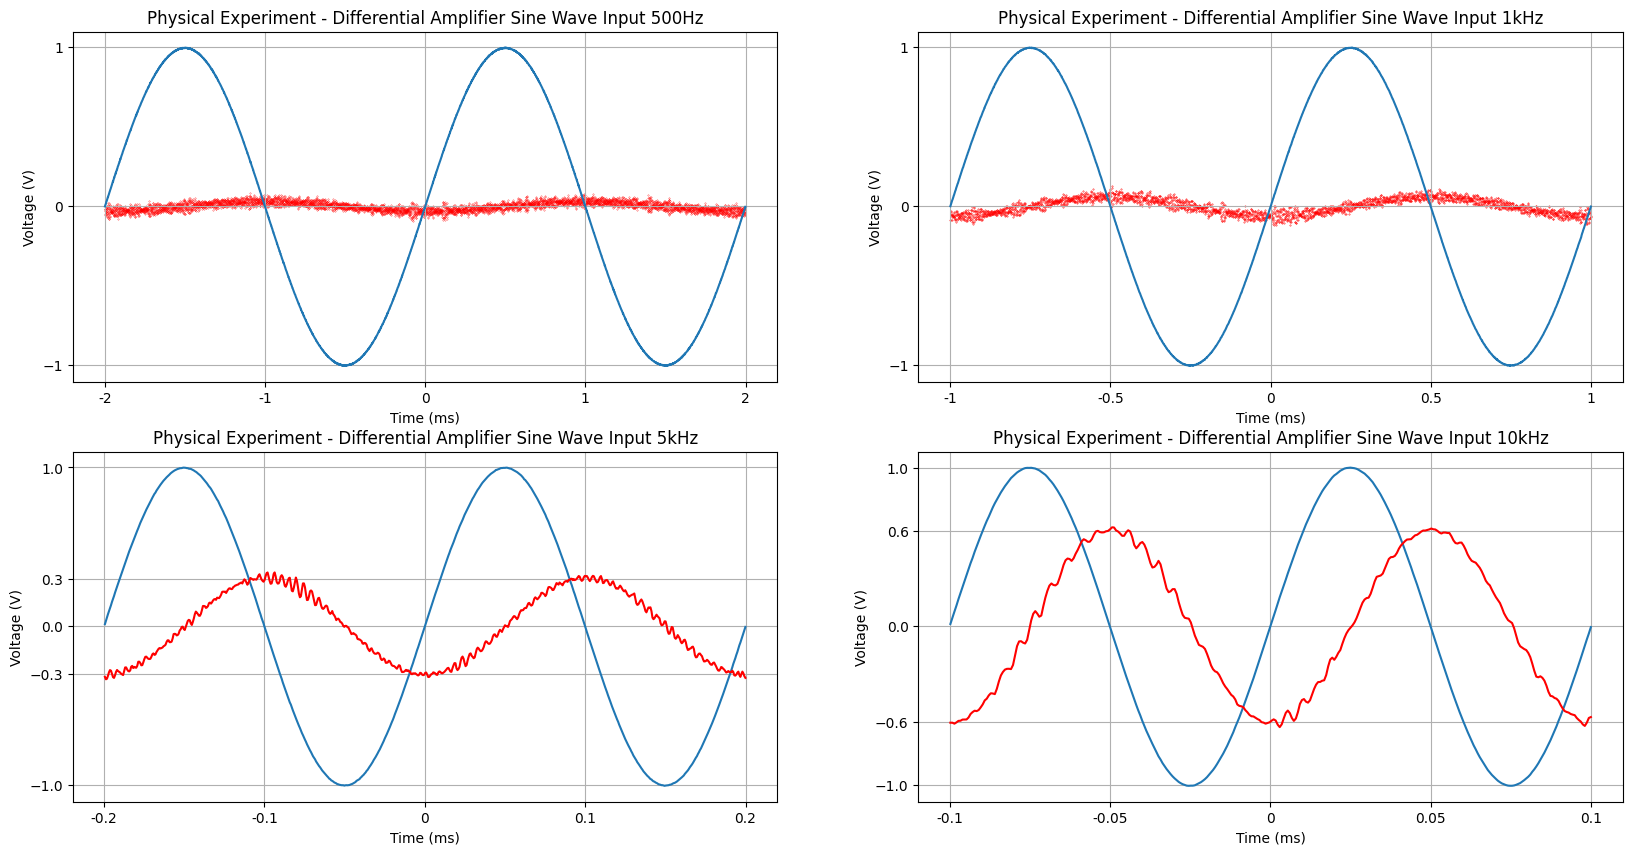

In [6]:
df500 = pd.read_csv(".\inlab\differential\sine\differential500.csv", skiprows=19, encoding="latin1")
df500.columns = ["time", "inputV", "outputV"]
df1k = pd.read_csv(".\inlab\differential\sine\differential1k.csv", skiprows=19, encoding="latin1")
df1k.columns = ["time", "inputV", "outputV"]
df5k = pd.read_csv(".\inlab\differential\sine\differential5k.csv", skiprows=19, encoding="latin1")
df5k.columns = ["time", "inputV", "outputV"]
df10k = pd.read_csv(".\inlab\differential\sine\differential10k.csv", skiprows=19, encoding="latin1")
df10k.columns = ["time", "inputV", "outputV"]

differentialSineDataset = [df500, df1k, df5k, df10k]

#Plot all df in differentialSineDataset
#Get the point where the input is 0 and greater than -0015
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
df500 = df500[(df500["time"] > -1/500) & (df500["time"] < 1/500 )]
plt.plot(df500["time"], df500["inputV"], label="input")
plt.scatter(df500["time"], df500["outputV"], label="output", s=0.05, c="r")
plt.xticks([-1/500,-.5/500, 0, .5/500, 1/500], ["-2", "-1", "0", "1", "2"])
plt.yticks([-1, 0, 1])
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (V)")
plt.title("Physical Experiment - Differential Amplifier Sine Wave Input 500Hz")
plt.grid()

plt.subplot(2,2,2)
df1k = df1k[(df1k["time"] > -1/1000) & (df1k["time"] < 1/1000 )]
plt.plot(df1k["time"], df1k["inputV"], label="input")
plt.scatter(df1k["time"], df1k["outputV"], label="output", s=0.1, c="r")
plt.xticks([-1/1000,-.5/1000, 0, .5/1000, 1/1000], ["-1", "-0.5", "0", "0.5", "1"])
plt.yticks([-1, 0, 1])
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (V)")
plt.title("Physical Experiment - Differential Amplifier Sine Wave Input 1kHz")
plt.grid()

plt.subplot(2,2,3)
df5k = df5k[(df5k["time"] > -1/5000) & (df5k["time"] < 1/5000 )]
plt.plot(df5k["time"], df5k["inputV"], label="input")
plt.plot(df5k["time"], df5k["outputV"], label="output", c="r")
plt.xticks([-1/5000,-.5/5000, 0, .5/5000, 1/5000], ["-0.2", "-0.1", "0", "0.1", "0.2"])
plt.yticks([-1, -.3, 0, .3, 1])
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (V)")
plt.title("Physical Experiment - Differential Amplifier Sine Wave Input 5kHz")
plt.grid()

plt.subplot(2,2,4)
df10k = df10k[(df10k["time"] > -1/10000) & (df10k["time"] < 1/10000 )]
plt.plot(df10k["time"], df10k["inputV"], label="input")
plt.plot(df10k["time"], df10k["outputV"], label="output", c="r")
plt.xticks([-1/10000,-.5/10000, 0, .5/10000, 1/10000], ["-0.1", "-0.05", "0", "0.05", "0.1"])
plt.yticks([-1,-.6, 0, .6, 1])
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (V)")
plt.title("Physical Experiment - Differential Amplifier Sine Wave Input 10kHz")
plt.grid()



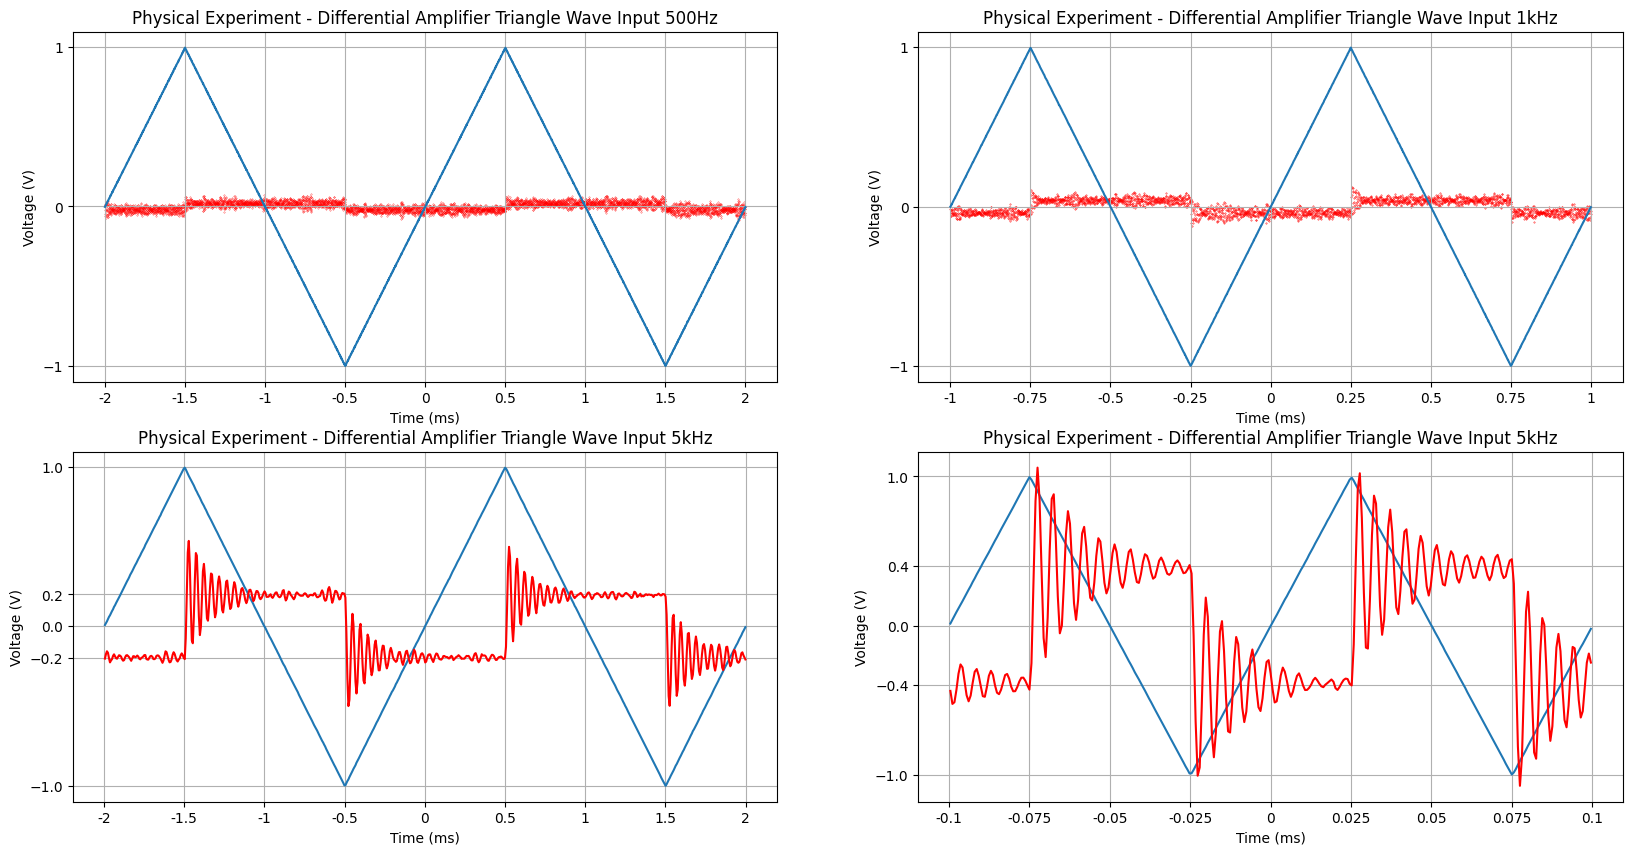

In [27]:
df500 = pd.read_csv(".\inlab\differential\\triangle\differentialTriangle500.csv", skiprows=19, encoding="latin1")
df500.columns = ["time", "inputV", "outputV"]
df1k = pd.read_csv(".\inlab\differential\\triangle\differentialTriangle1k.csv", skiprows=19, encoding="latin1")
df1k.columns = ["time", "inputV", "outputV"]
df5k = pd.read_csv(".\inlab\differential\\triangle\differentialTriangle5k.csv", skiprows=19, encoding="latin1")
df5k.columns = ["time", "inputV", "outputV"]
df10k = pd.read_csv(".\inlab\differential\\triangle\differentialTriangle10k.csv", skiprows=19, encoding="latin1")
df10k.columns = ["time", "inputV", "outputV"]

differentialSineDataset = [df500, df1k, df5k, df10k]

#Plot all df in differentialSineDataset
#Get the point where the input is 0 and greater than -0015
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
df500 = df500[(df500["time"] > -1/500) & (df500["time"] < 1/500 )]
plt.plot(df500["time"], df500["inputV"], label="input")
plt.scatter(df500["time"], df500["outputV"], label="output", s=0.05, c="r")
plt.xticks([-1/500, -0.75/500, -0.5/500, -0.25/500, 0, 0.25/500, 0.5/500, 0.75/500, 1/500], ["-2", "-1.5", "-1", "-0.5", "0", "0.5", "1", "1.5", "2"])
plt.yticks([-1, 0, 1])
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (V)")
plt.title("Physical Experiment - Differential Amplifier Triangle Wave Input 500Hz")
plt.grid()

plt.subplot(2,2,2)
df1k = df1k[(df1k["time"] > -1/1000) & (df1k["time"] < 1/1000 )]
plt.plot(df1k["time"], df1k["inputV"], label="input")
plt.scatter(df1k["time"], df1k["outputV"], label="output", s=0.1, c="r")
plt.xticks([-1/1000, -0.75/1000, -0.5/1000, -0.25/1000, 0, 0.25/1000, 0.5/1000, 0.75/1000, 1/1000], ["-1", "-0.75", "-0.5", "-0.25", "0", "0.25", "0.5", "0.75", "1"])
plt.yticks([-1, 0, 1])
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (V)")
plt.title("Physical Experiment - Differential Amplifier Triangle Wave Input 1kHz")
plt.grid()

plt.subplot(2,2,3)
df5k = df5k[(df5k["time"] > -1/5000) & (df5k["time"] < 1/5000 )]
plt.plot(df5k["time"], df5k["inputV"], label="input")
plt.plot(df5k["time"], df5k["outputV"], label="output", c="r")
plt.xticks([-1/5000, -0.75/5000, -0.5/5000, -0.25/5000, 0, 0.25/5000, 0.5/5000, 0.75/5000, 1/5000], ["-2", "-1.5", "-1", "-0.5", "0", "0.5", "1", "1.5", "2"])
plt.yticks([-1, -.2, 0, .2, 1])
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (V)")
plt.title("Physical Experiment - Differential Amplifier Triangle Wave Input 5kHz")
plt.grid()

plt.subplot(2,2,4)
df10k = df10k[(df10k["time"] > -1/10000) & (df10k["time"] < 1/10000 )]
plt.plot(df10k["time"], df10k["inputV"], label="input")
plt.plot(df10k["time"], df10k["outputV"], label="output", c="r")
plt.xticks([-1/10000, -0.75/10000, -0.5/10000, -0.25/10000, 0, 0.25/10000, 0.5/10000, 0.75/10000, 1/10000], ["-0.1", "-0.075", "-0.05", "-0.025", "0", "0.025", "0.05", "0.075", "0.1"])
plt.yticks([-1, -.4, 0, .4,1])
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (V)")
plt.title("Physical Experiment - Differential Amplifier Triangle Wave Input 5kHz")
plt.grid()




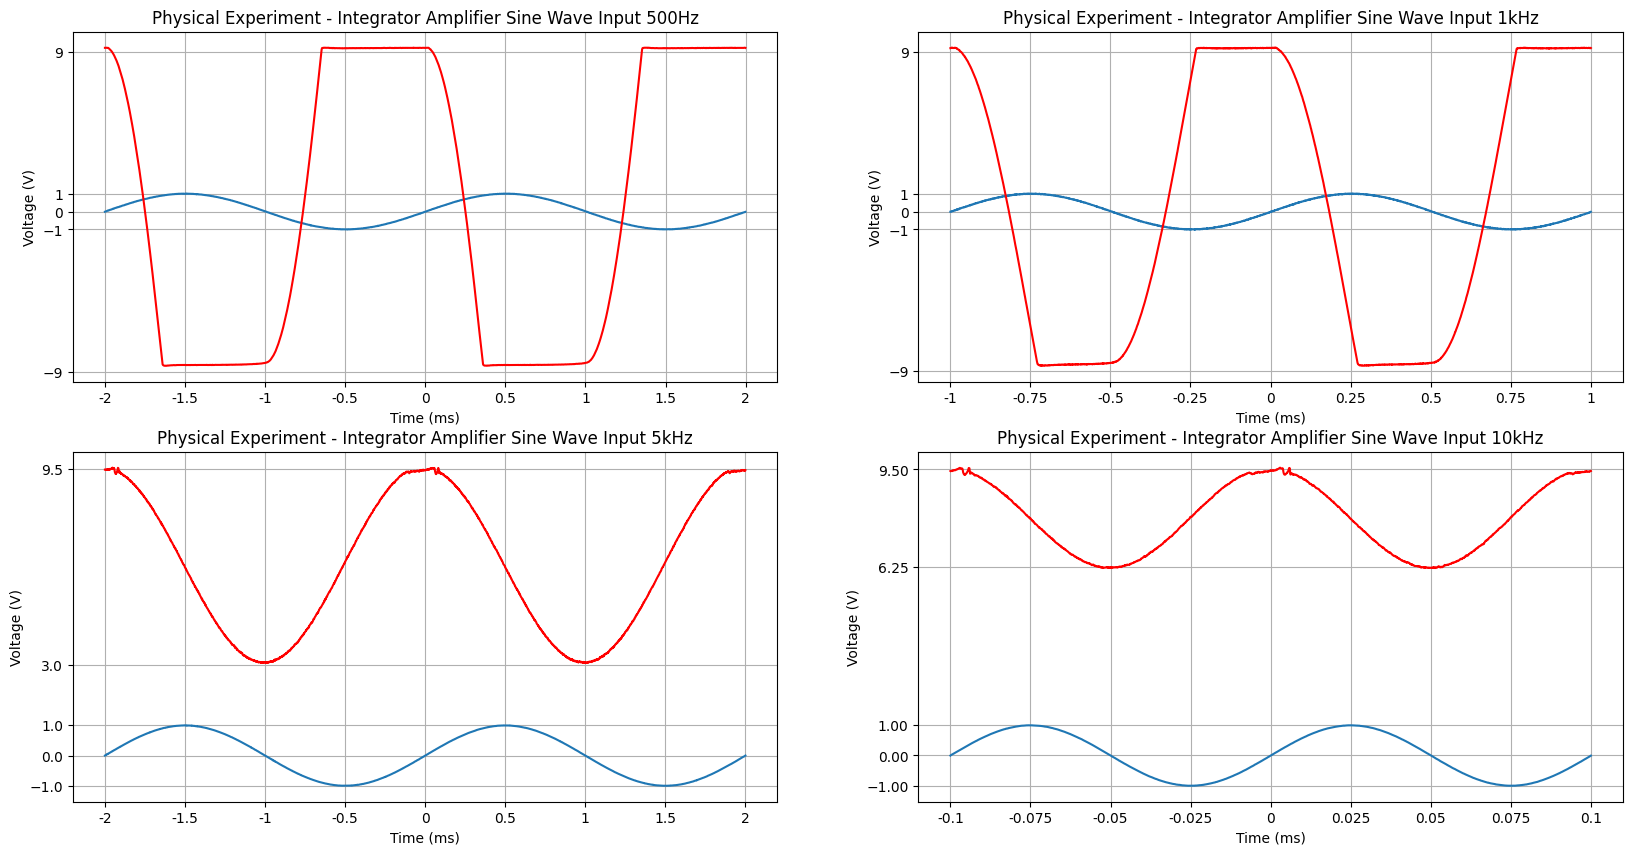

In [28]:
df500 = pd.read_csv(".\inlab\intergrator\sine\IntegralSine500.csv", skiprows=24, encoding="latin1")
df500.columns = ["time", "inputV", "outputV"]
df1k = pd.read_csv(".\inlab\intergrator\sine\IntegralSine1k.csv", skiprows=24, encoding="latin1")
df1k.columns = ["time", "inputV", "outputV"]
df5k = pd.read_csv(".\inlab\intergrator\sine\IntegralSine5k.csv", skiprows=19, encoding="latin1")
df5k.columns = ["time", "inputV", "outputV"]
df10k = pd.read_csv(".\inlab\intergrator\sine\IntegralSine10k.csv", skiprows=19, encoding="latin1")
df10k.columns = ["time", "inputV", "outputV"]

differentialSineDataset = [df500, df1k, df5k, df10k]

#Plot all df in differentialSineDataset
#Get the point where the input is 0 and greater than -0015
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
df500 = df500[(df500["time"] > -1/500) & (df500["time"] < 1/500 )]
plt.plot(df500["time"], df500["inputV"], label="input")
plt.plot(df500["time"], df500["outputV"], label="output", c="r")
plt.xticks([-1/500, -0.75/500, -0.5/500, -0.25/500, 0, 0.25/500, 0.5/500, 0.75/500, 1/500], ["-2", "-1.5", "-1", "-0.5", "0", "0.5", "1", "1.5", "2"])
plt.yticks([-9,-1, 0, 1,9])
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (V)")
plt.title("Physical Experiment - Integrator Amplifier Sine Wave Input 500Hz")
plt.grid()

plt.subplot(2,2,2)
df1k = df1k[(df1k["time"] > -1/1000) & (df1k["time"] < 1/1000 )]
plt.plot(df1k["time"], df1k["inputV"], label="input")
plt.plot(df1k["time"], df1k["outputV"], label="output", c="r")
plt.xticks([-1/1000, -0.75/1000, -0.5/1000, -0.25/1000, 0, 0.25/1000, 0.5/1000, 0.75/1000, 1/1000], ["-1", "-0.75", "-0.5", "-0.25", "0", "0.25", "0.5", "0.75", "1"])
plt.yticks([-9,-1, 0, 1,9])
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (V)")
plt.title("Physical Experiment - Integrator Amplifier Sine Wave Input 1kHz")
plt.grid()

plt.subplot(2,2,3)
df5k = df5k[(df5k["time"] > -1/5000) & (df5k["time"] < 1/5000 )]
plt.plot(df5k["time"], df5k["inputV"], label="input")
plt.plot(df5k["time"], df5k["outputV"], label="output", c="r")
plt.xticks([-1/5000, -0.75/5000, -0.5/5000, -0.25/5000, 0, 0.25/5000, 0.5/5000, 0.75/5000, 1/5000], ["-2", "-1.5", "-1", "-0.5", "0", "0.5", "1", "1.5", "2"])
plt.yticks([-1, 0, 1,3,9.5])
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (V)")
plt.title("Physical Experiment - Integrator Amplifier Sine Wave Input 5kHz")
plt.grid()

plt.subplot(2,2,4)
df10k = df10k[(df10k["time"] > -1/10000) & (df10k["time"] < 1/10000 )]
plt.plot(df10k["time"], df10k["inputV"], label="input")
plt.plot(df10k["time"], df10k["outputV"], label="output", c="r")
plt.xticks([-1/10000, -0.75/10000, -0.5/10000, -0.25/10000, 0, 0.25/10000, 0.5/10000, 0.75/10000, 1/10000], ["-0.1", "-0.075", "-0.05", "-0.025", "0", "0.025", "0.05", "0.075", "0.1"])
plt.yticks([-1, 0, 1, 6.25, 9.5])
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (V)")
plt.title("Physical Experiment - Integrator Amplifier Sine Wave Input 10kHz")
plt.grid()



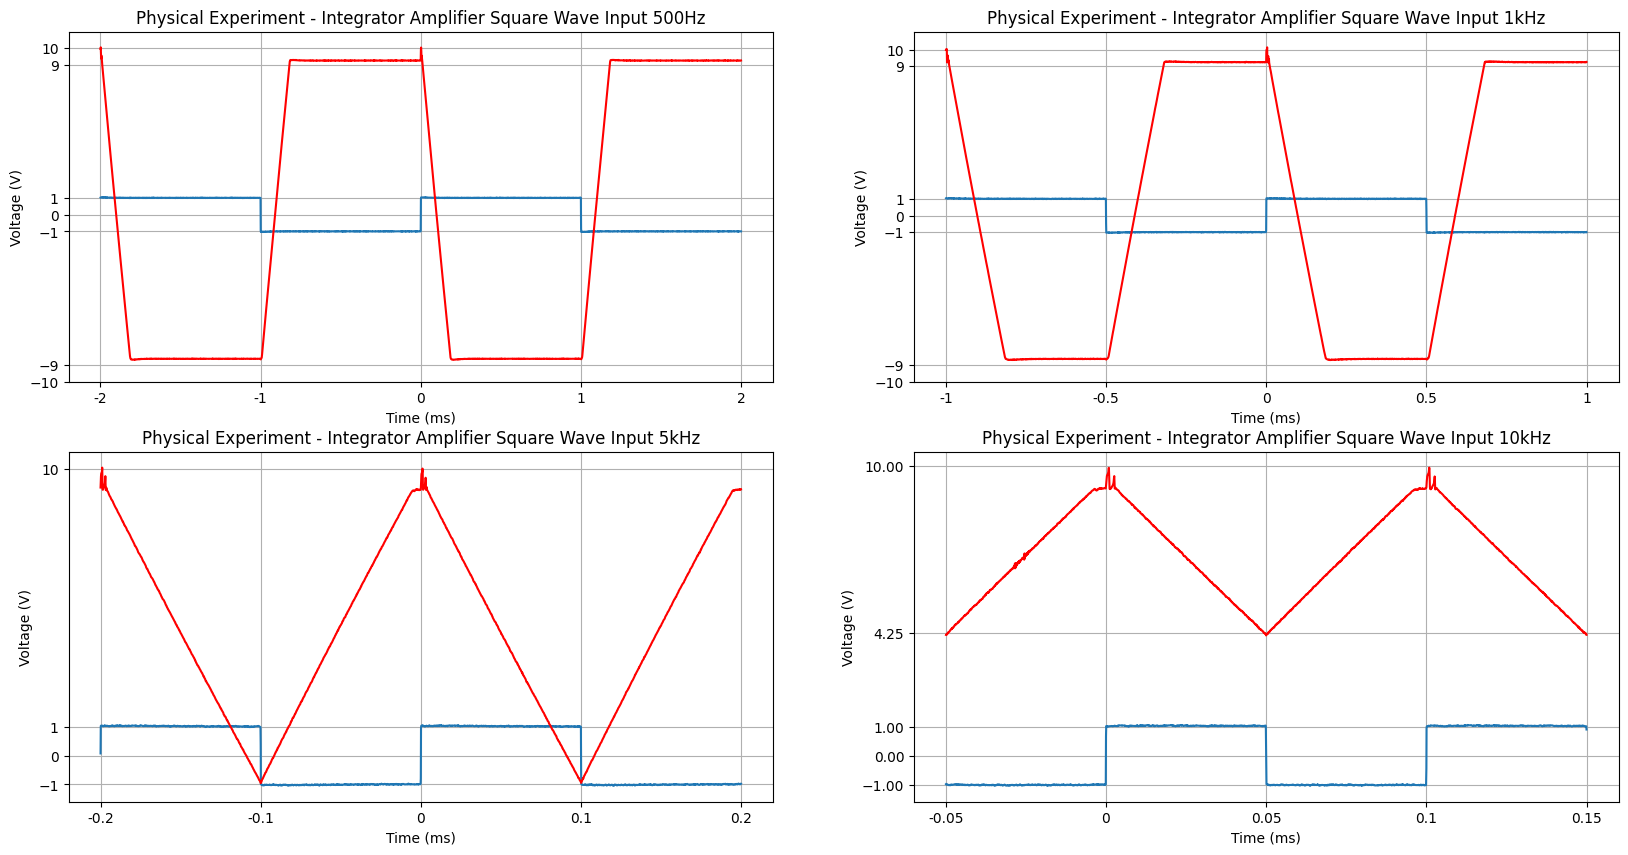

In [29]:
df500 = pd.read_csv(".\inlab\intergrator\\triangle\IntegralTriangle500.csv", skiprows=24, encoding="latin1")
df500.columns = ["time", "inputV", "outputV"]
df1k = pd.read_csv(".\inlab\intergrator\\triangle\IntegralTriangle1k.csv", skiprows=24, encoding="latin1")
df1k.columns = ["time", "inputV", "outputV"]
df5k = pd.read_csv(".\inlab\intergrator\\triangle\IntegralTriangle5k.csv", skiprows=24, encoding="latin1")
df5k.columns = ["time", "inputV", "outputV"]
df10k = pd.read_csv(".\inlab\intergrator\\triangle\IntegralTriangle10k.csv", skiprows=24, encoding="latin1")
df10k.columns = ["time", "inputV", "outputV"]

differentialSineDataset = [df500, df1k, df5k, df10k]

#Plot all df in differentialSineDataset
#Get the point where the input is 0 and greater than -0015
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
df500 = df500[(df500["time"] > -1/500) & (df500["time"] < 1/500 )]
plt.plot(df500["time"], df500["inputV"], label="input")
plt.plot(df500["time"], df500["outputV"], label="output", c="r")
plt.xticks([-1/500,-.5/500, 0, .5/500, 1/500], ["-2", "-1", "0", "1", "2"])
plt.yticks([-10, -9,-1, 0, 1, 9, 10])
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (V)")
plt.title("Physical Experiment - Integrator Amplifier Square Wave Input 500Hz")
plt.grid()

plt.subplot(2,2,2)
df1k = df1k[(df1k["time"] > -1/1000) & (df1k["time"] < 1/1000 )]
plt.plot(df1k["time"], df1k["inputV"], label="input")
plt.plot(df1k["time"], df1k["outputV"], label="output", c="r")
plt.xticks([-1/1000,-.5/1000, 0, .5/1000, 1/1000], ["-1", "-0.5", "0", "0.5", "1"])
plt.yticks([-10, -9,-1, 0, 1, 9, 10])
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (V)")
plt.title("Physical Experiment - Integrator Amplifier Square Wave Input 1kHz")
plt.grid()

plt.subplot(2,2,3)
df5k = df5k[(df5k["time"] > -1/5000) & (df5k["time"] < 1/5000 )]
plt.plot(df5k["time"], df5k["inputV"], label="input")
plt.plot(df5k["time"], df5k["outputV"], label="output", c="r")
plt.xticks([-1/5000,-.5/5000, 0, .5/5000, 1/5000], ["-0.2", "-0.1", "0", "0.1", "0.2"])
plt.yticks([-1, 0, 1, 10])
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (V)")
plt.title("Physical Experiment - Integrator Amplifier Square Wave Input 5kHz")
plt.grid()

plt.subplot(2,2,4)
df10k = df10k[(df10k["time"] > -.5/10000) & (df10k["time"] < 1.5/10000 )]
plt.plot(df10k["time"], df10k["inputV"], label="input")
plt.plot(df10k["time"], df10k["outputV"], label="output", c="r")
plt.xticks([-.5/10000, 0, .5/10000, 1/10000, 1.5/10000], ["-0.05", "0", "0.05", "0.1", "0.15"])
plt.yticks([-1, 0, 1, 4.25,10])
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (V)")
plt.title("Physical Experiment - Integrator Amplifier Square Wave Input 10kHz")
plt.grid()



Text(0.5, 1.0, 'Physical Experiment - Wien Bridge Oscillator Output Voltage')

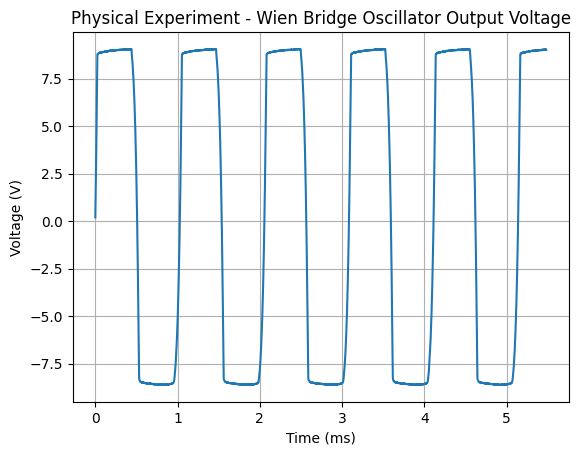

In [30]:
#Plot the wienBridge
df = pd.read_csv(".\inlab\wienBridge.csv", skiprows=27, encoding="latin1")
df.columns = ["time", "outputV", "null"]

df = df[(df["time"] > 0)]
plt.plot(df["time"] * 1000, df["outputV"])
plt.grid()
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (V)")
plt.title("Physical Experiment - Wien Bridge Oscillator Output Voltage")
